/home/jiarongw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/home/jiarongw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


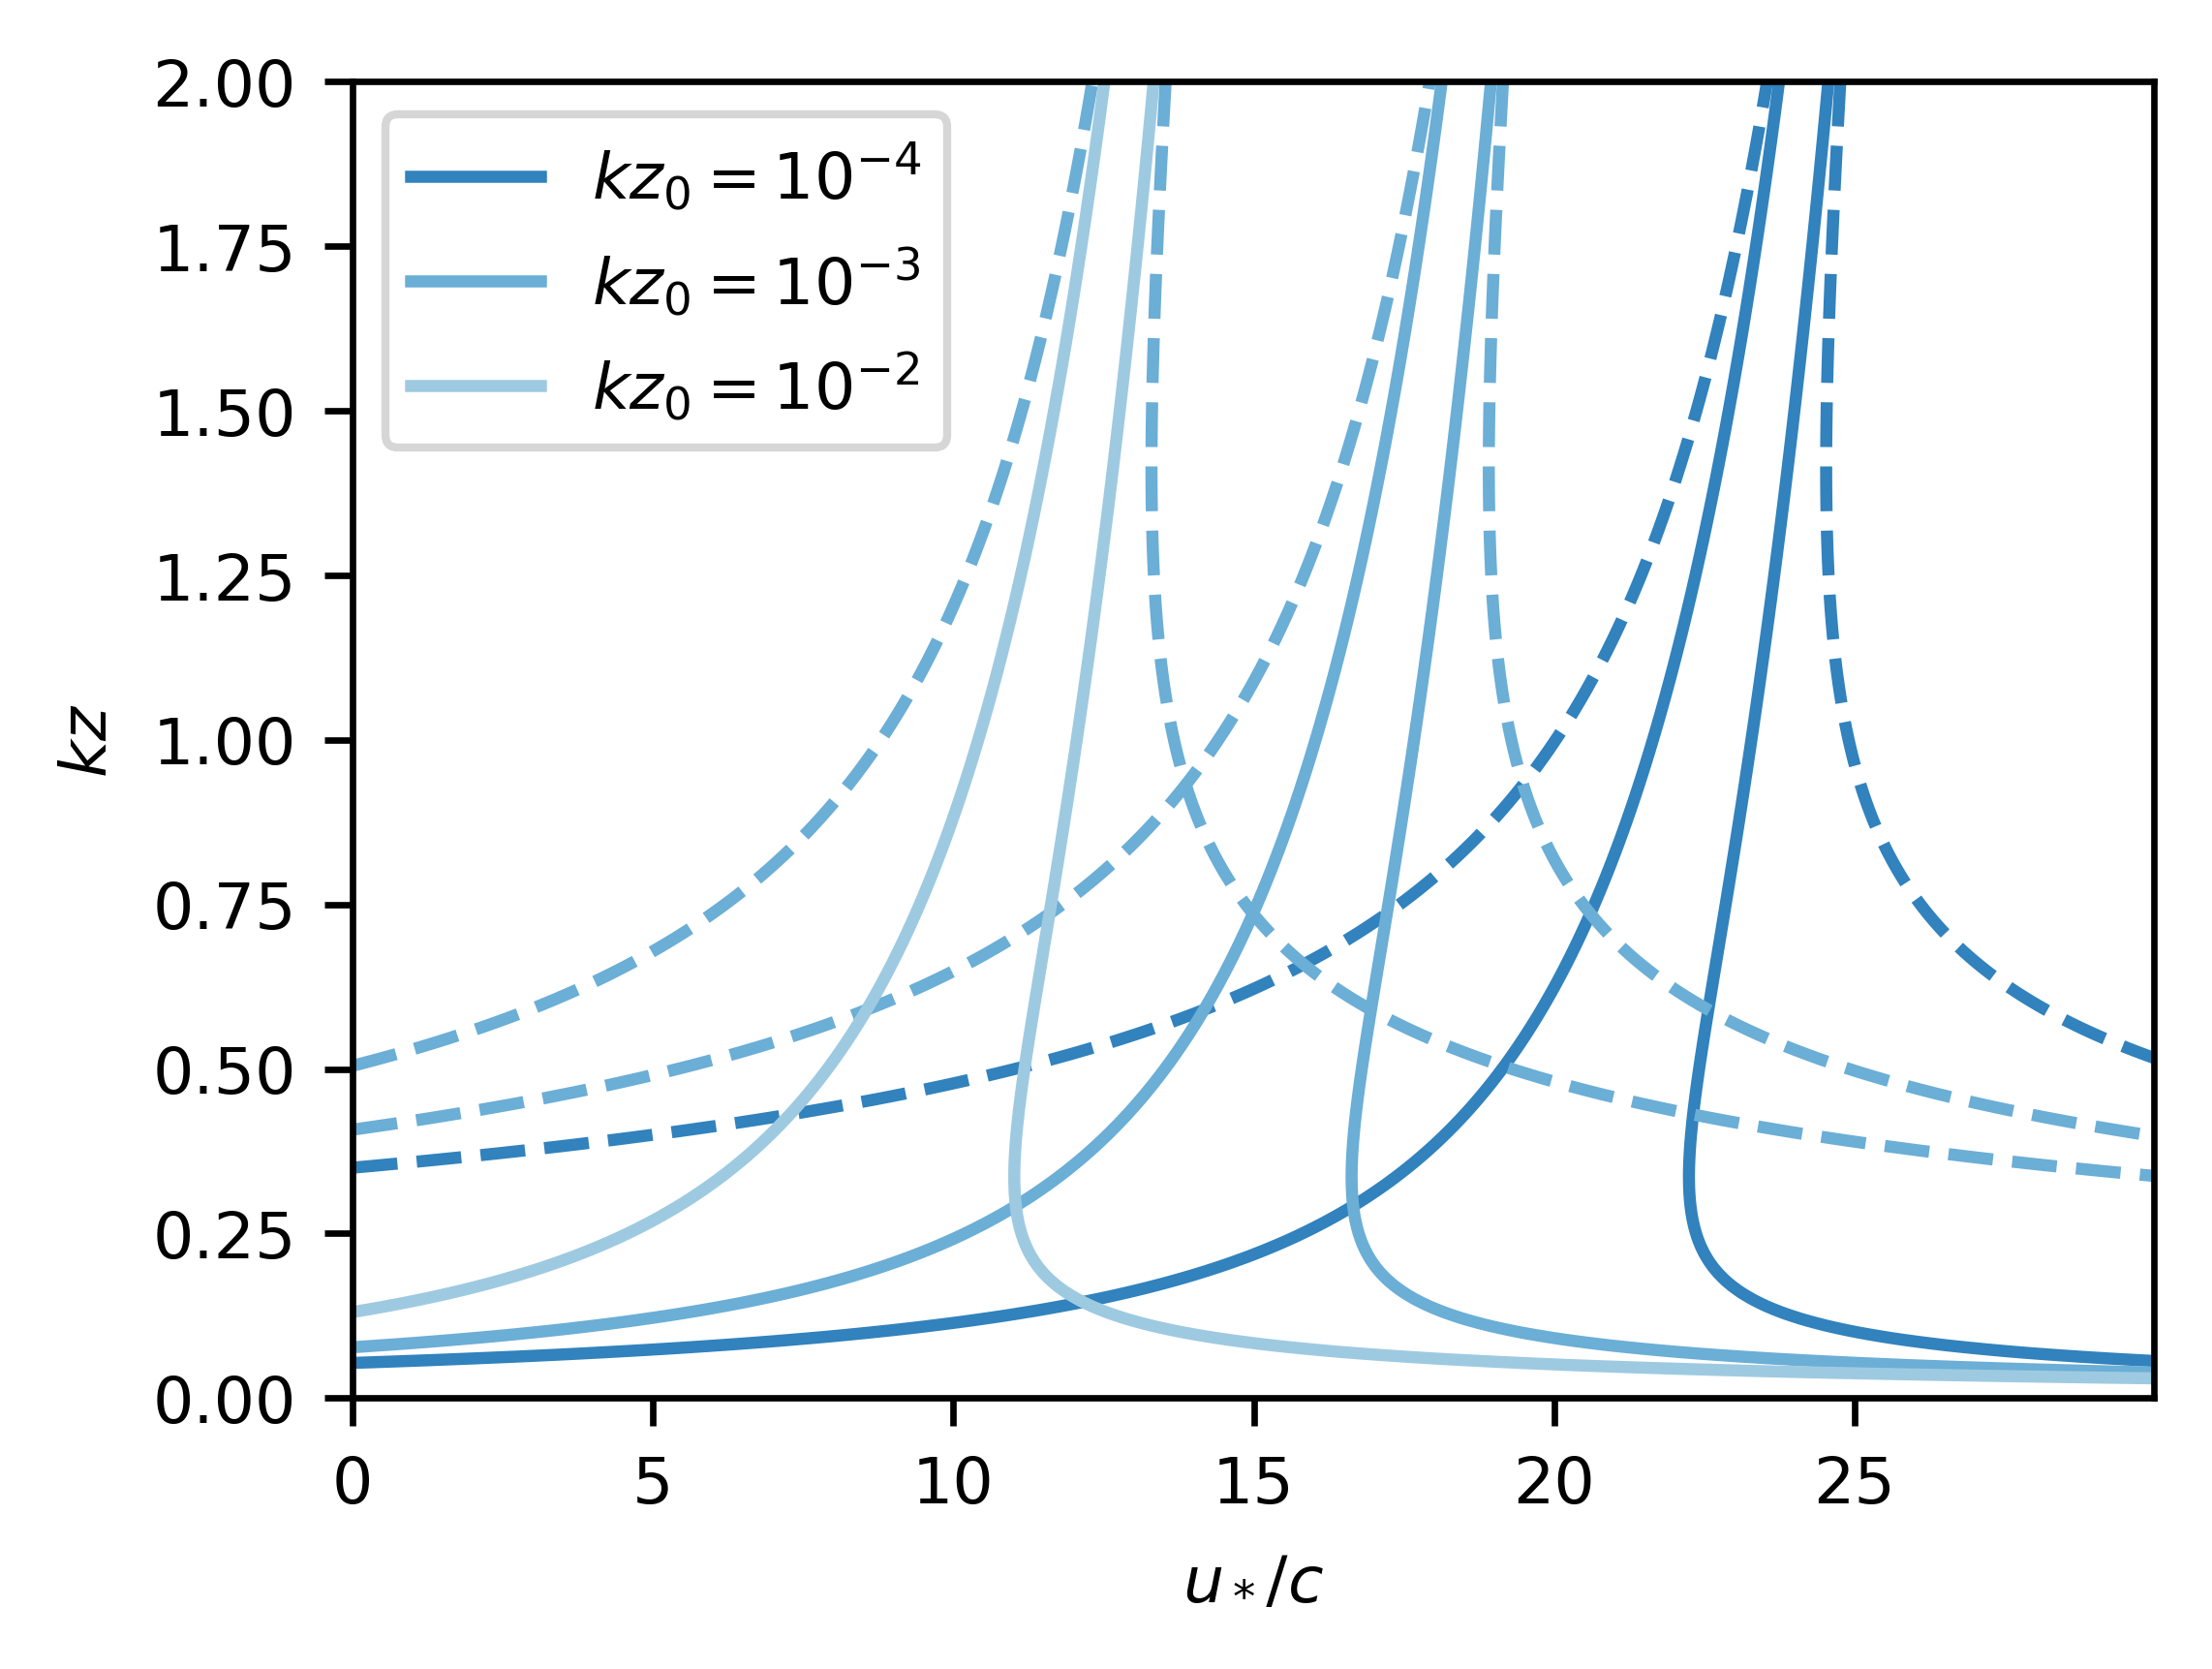

In [25]:
from matplotlib import pyplot as plt
import sys, os
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/')
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/windwave/')
# sys.path.append('/home/jiarong/research/postprocessing/jupyter_notebook/functions/')
from tqdm import tqdm
import matplotlib as mpl
"""Use customized plotting theme"""
import matplotlib as mpl
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/pof.mplstyle')
import numpy as np

fig = plt.figure(figsize=[4,3])
delta = 0.01
y = np.arange(0, 2.01, delta)
x = np.arange(0, 30, delta)
p, q = np.meshgrid(x, y)
# define some function f(n,x,y)
f1 = lambda kappa, z0, x, y: y*np.abs(np.log(y/z0)-kappa*x) - 2*kappa**2
f2 = lambda kappa, z0, x, y: y**2*np.abs(np.log(y/z0)-kappa*x) - 1

# plot contour line of f(1,x,y)==0
z = f1(0.41, 0.0001, p, q)
plt.contour(p, q, z, [0], colors=[plt.get_cmap('tab20c')(0)])
z = f2(0.41, 0.0001, p, q)
plt.contour(p, q, z, [0], linestyles=['--'], colors=[plt.get_cmap('tab20c')(0)])
proxy1, = plt.plot([], color=plt.get_cmap('tab20c')(0))

z = f1(0.41, 0.001, p, q)
plt.contour(p, q, z, [0], colors=[plt.get_cmap('tab20c')(1)])
z = f2(0.41, 0.001, p, q)
plt.contour(p, q, z, [0], linestyles=['--'], colors=[plt.get_cmap('tab20c')(1)])
proxy2, = plt.plot([], color=plt.get_cmap('tab20c')(1))

z = f1(0.41, 0.01, p, q)
plt.contour(p, q, z, [0], colors=[plt.get_cmap('tab20c')(2)])
z = f2(0.41, 0.01, p, q)
plt.contour(p, q, z, [0], linestyles=['--'], colors=[plt.get_cmap('tab20c')(1)])
proxy3, = plt.plot([], color=plt.get_cmap('tab20c')(2))

#make legend
plt.legend(handles=[proxy1,proxy2,proxy3], labels=[r"$kz_0 = 10^{-4}$", r"$kz_0 = 10^{-3}$", r"$kz_0 = 10^{-2}$"], loc='upper left')
plt.xlabel(r'$u_*/c$'); plt.ylabel(r'$kz$')
plt.show()  


NameError: name 'case' is not defined

In [48]:
from scipy.optimize import fsolve
"""Inner layer"""
def f1(y, x, z0, kappa):
    return y*np.abs(np.log(y/z0)-kappa*x) - 2*kappa**2
"""Middle layer"""
def f2(y, x, z0, kappa):
    return y**2*np.abs(np.log(y/z0)-kappa*x) - 1

kli = fsolve(f1, 0.1, args=(10,0.01,0.41))
print(kli)

[0.24203226]


In [113]:
delta = 0.01
x_ = np.arange(0, 10, delta)
kz0 = 0.01
kli_ = np.squeeze(np.array([fsolve(f1, 0.7, args=(x,kz0,0.41)) for x in x_])) # squeeze to have (n,) instead of (n,1) array shape
klm_ = np.squeeze(np.array([fsolve(f2, 1, args=(x,kz0,0.41)) for x in x_]))

(0, 2)

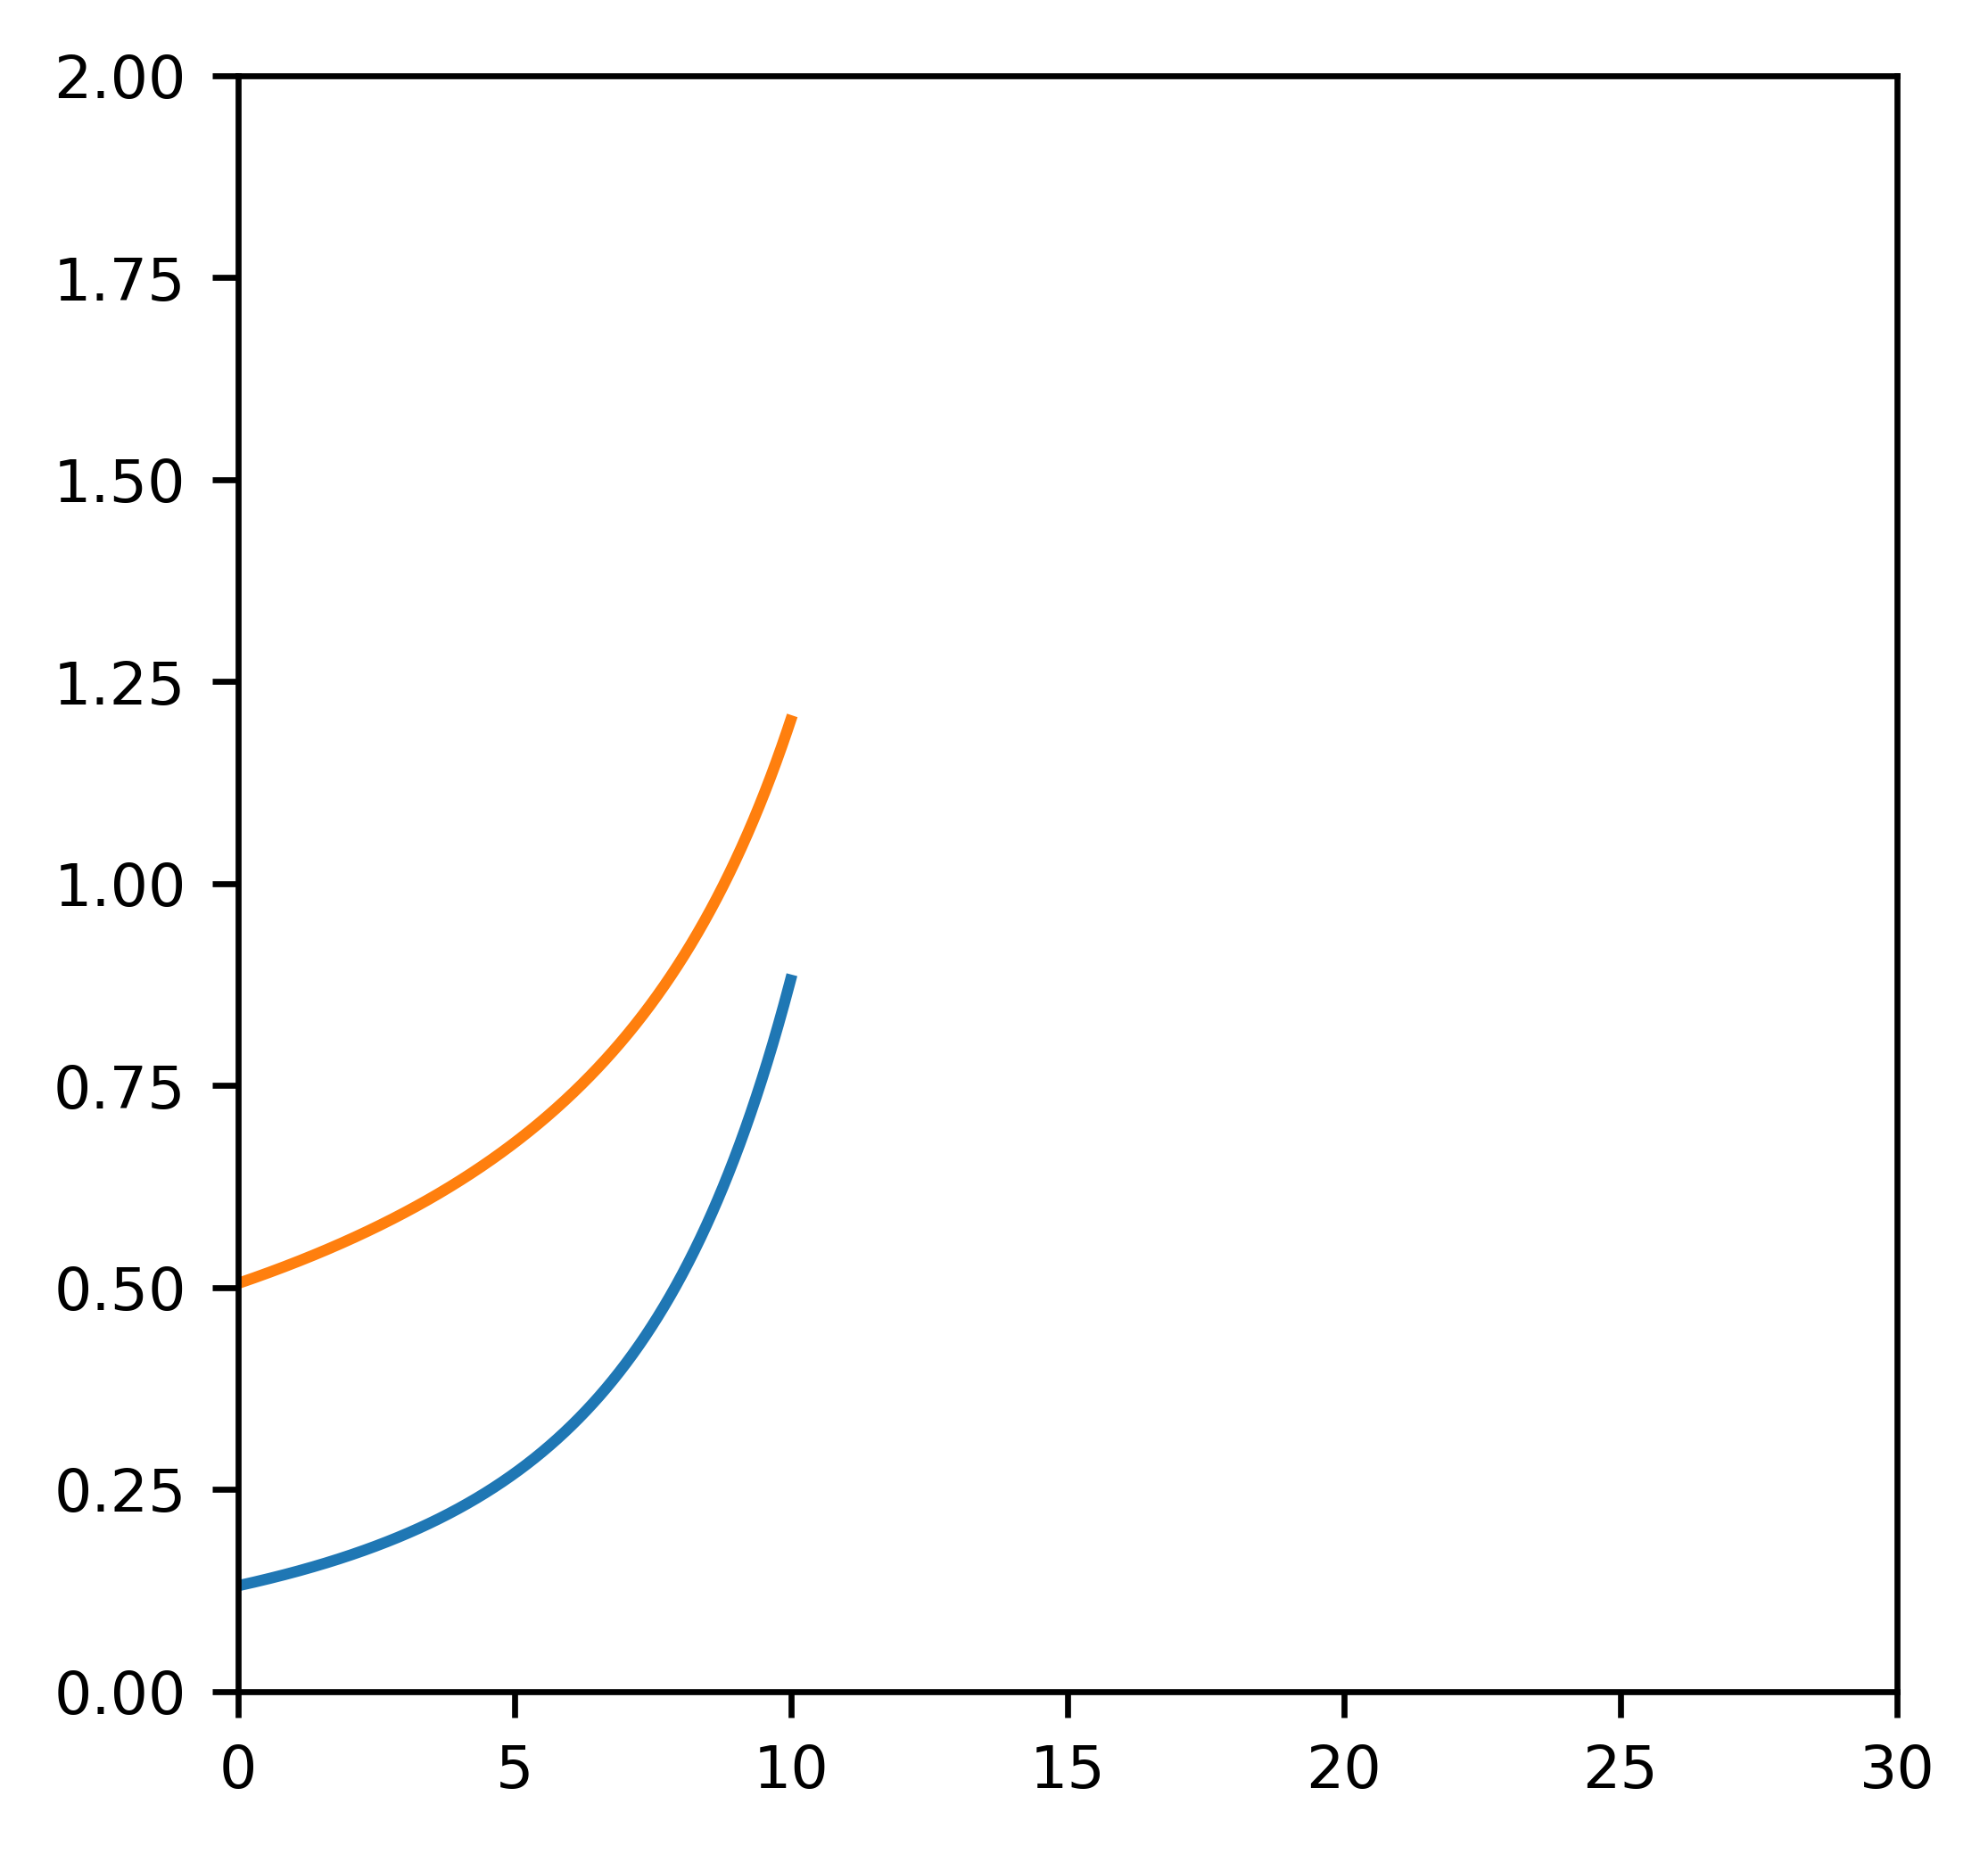

In [114]:
plt.plot(x_, kli_)
plt.plot(x_, klm_)
plt.xlim([0,30])
plt.ylim([0,2])

In [127]:
"""Find li and lm"""
step = 0.01
x_ = np.arange(0, 10, step)
kz0 = 0.01
kli_ = np.squeeze(np.array([fsolve(f1, 0.7, args=(x,kz0,0.41)) for x in x_])) # squeeze to have (n,) instead of (n,1) array shape
klm_ = np.squeeze(np.array([fsolve(f2, 1, args=(x,kz0,0.41)) for x in x_]))
"""Find Ui and Um"""
Ui_ = 2*0.41/kli_
Um_ = 1/0.41*(1/klm_)**2
c_ = np.array(x_)
"""Find beta and phi"""
beta_zs = 2*(Um_/Ui_)**4*(2-c_/(Ui_+c_))
beta_us = -2*(Um_/Ui_)**2*c_/(Ui_+c_)
delta = 1/(-1/0.41/np.log(kz0) - c_)
beta_0 = 2*0.41*delta_**1.8*Um_
phi_ = np.arctan(-(1/Um_)**2*beta_zs)
phi_prime = np.arctan(-(1/Um_)**2*18)

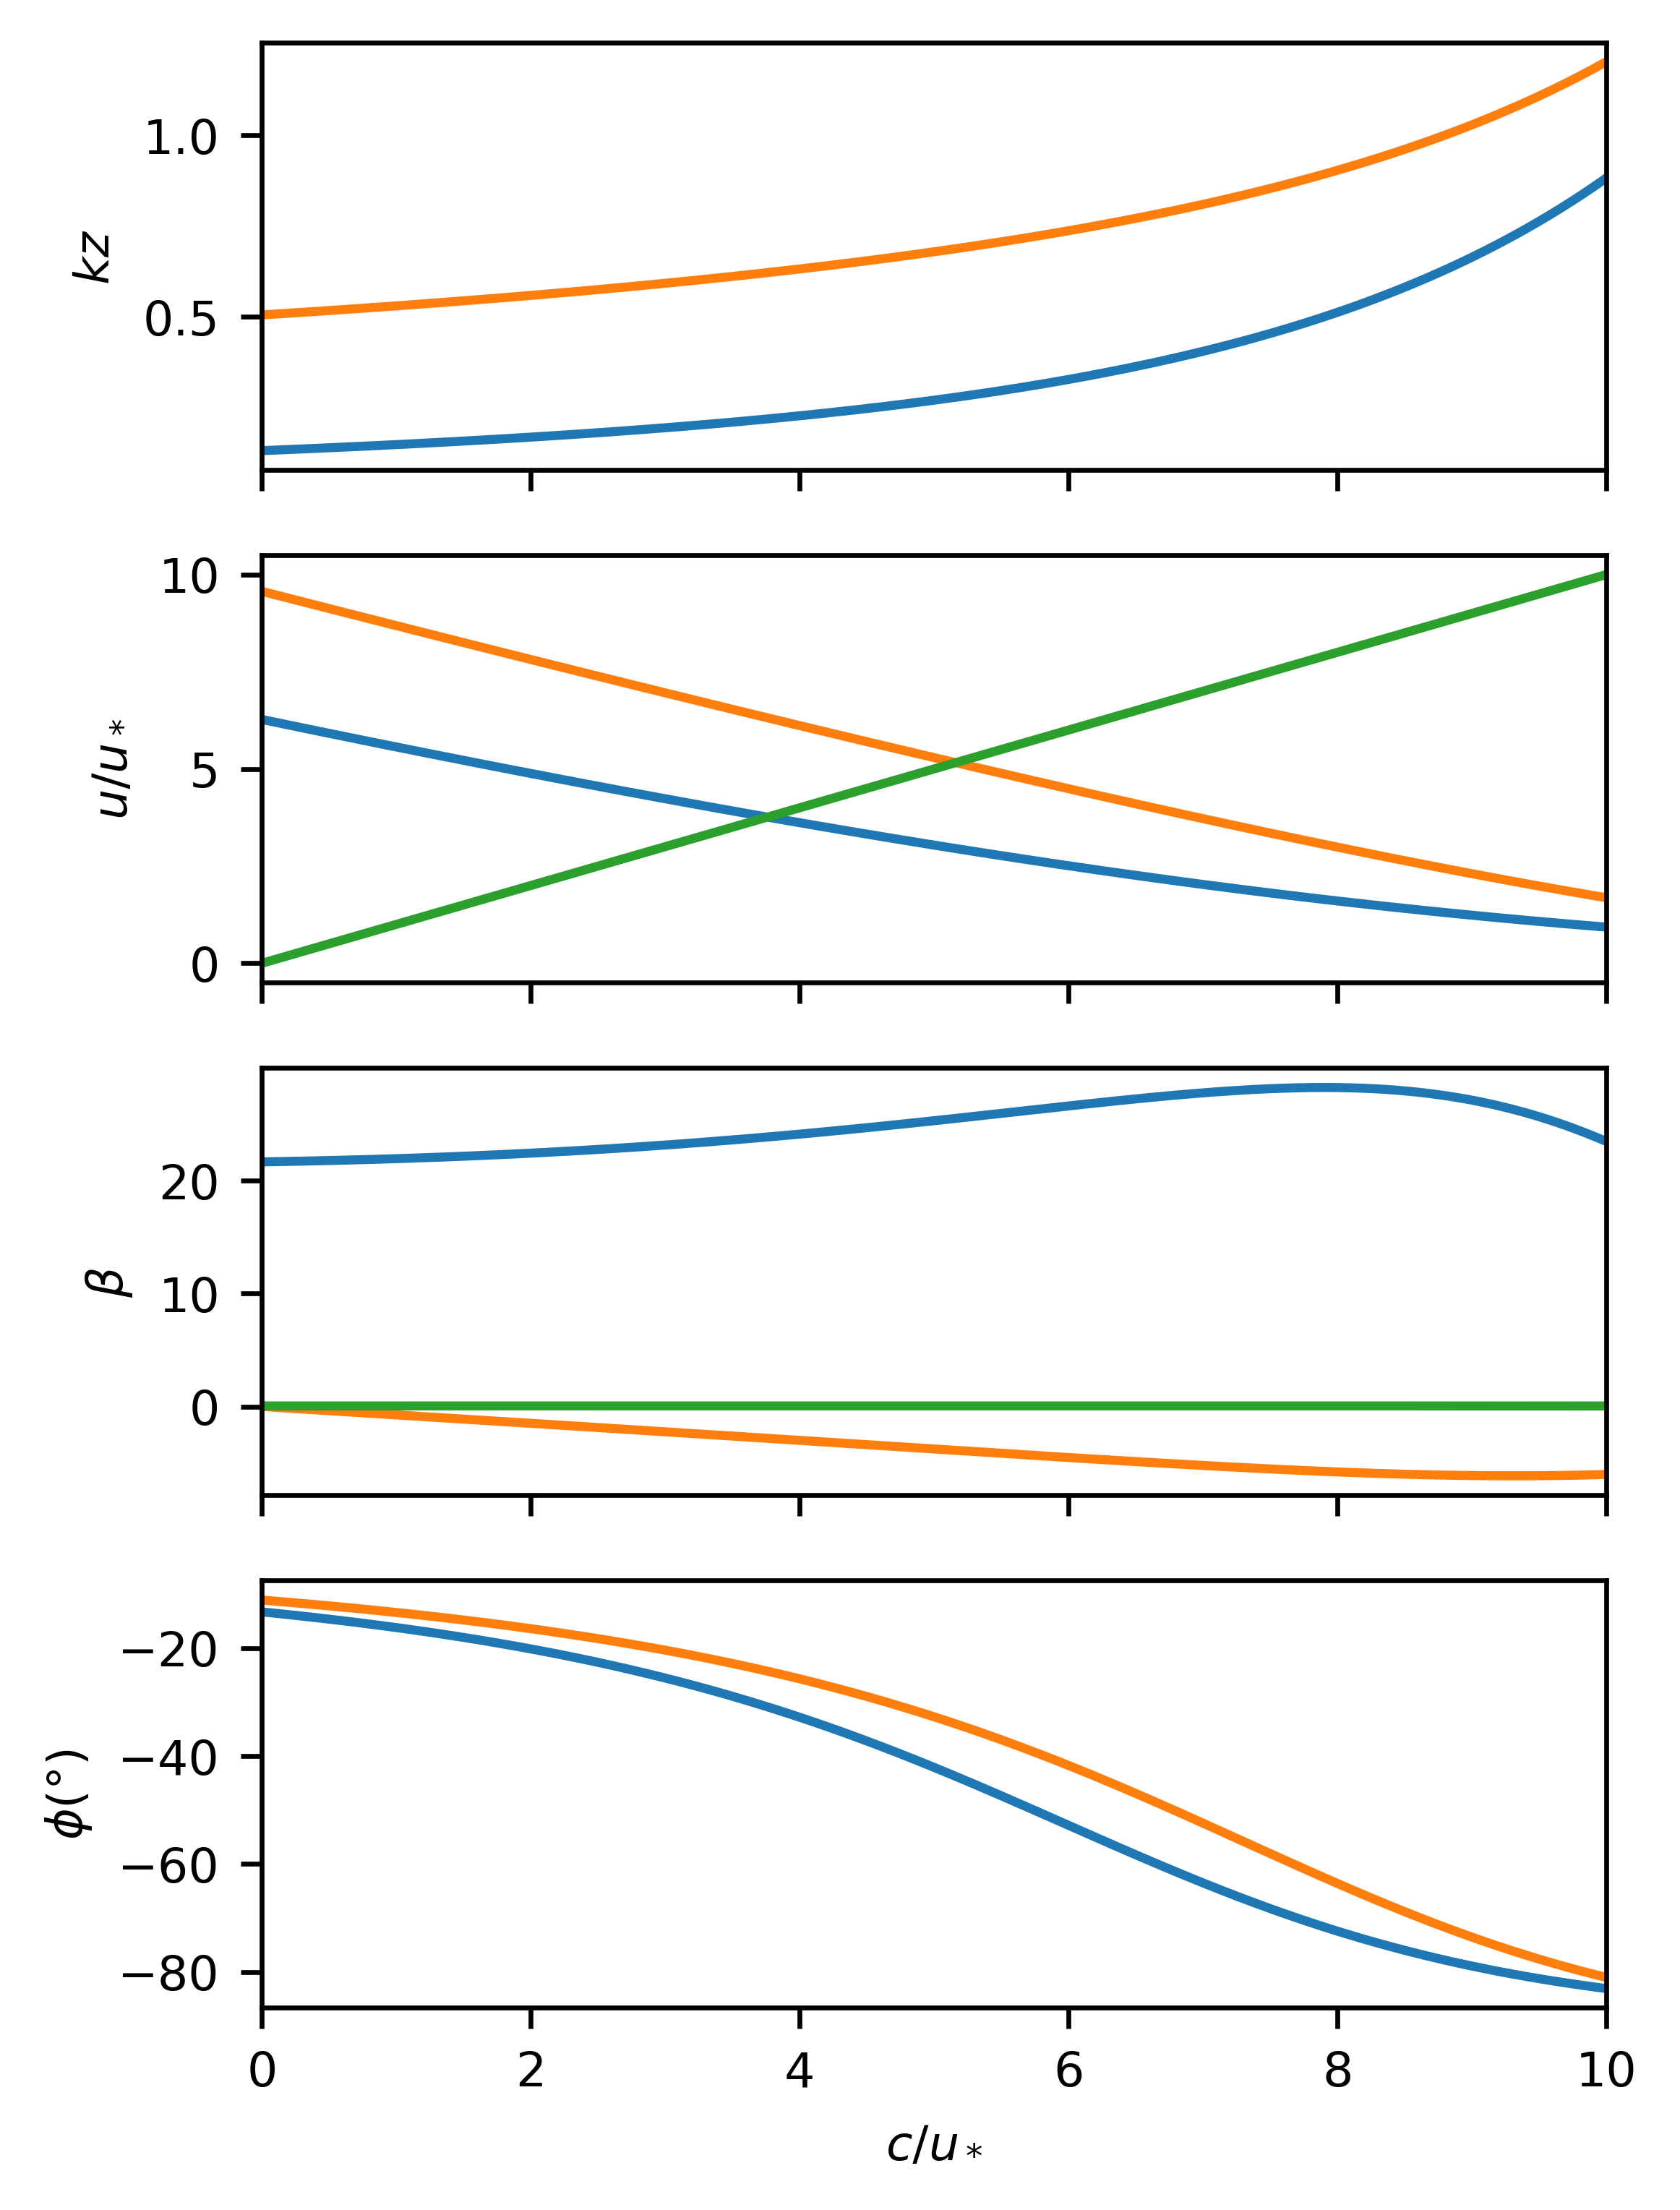

In [143]:
plt.figure(figsize=[4,6])

ax1 = plt.subplot(411)
plt.plot(x_, kli_)
plt.plot(x_, klm_)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r"$kz$")

# share x only
ax2 = plt.subplot(412, sharex=ax1)
plt.plot(x_, Ui_)
plt.plot(x_, Um_)
plt.plot(x_, c_)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r"$u/u_*$")

ax3 = plt.subplot(413, sharex=ax1)
plt.plot(x_, beta_zs)
plt.plot(x_, beta_us)
plt.plot(x_, beta_0)
plt.ylabel(r"$\beta$")
ax.annotate(r'$\beta_{zs}$', xy=(0.9, 0.9), ha='left', va='top', xycoords='axes fraction')
ax.annotate(r'$\beta_{o}$', xy=(0.9, 0.8), ha='left', va='top', xycoords='axes fraction')
ax.annotate(r'$\beta_{us}$', xy=(0.9, 0.65), ha='left', va='top', xycoords='axes fraction')
plt.setp(ax3.get_xticklabels(), visible=False)

ax4 = plt.subplot(414, sharex=ax1)
plt.plot(x_, np.degrees(phi_))
plt.plot(x_, np.degrees(phi_prime))
plt.ylabel(r'$\phi(\degree)$')

plt.xlim(0, 10)
plt.xlabel(r"$c/u_*$")
plt.show()

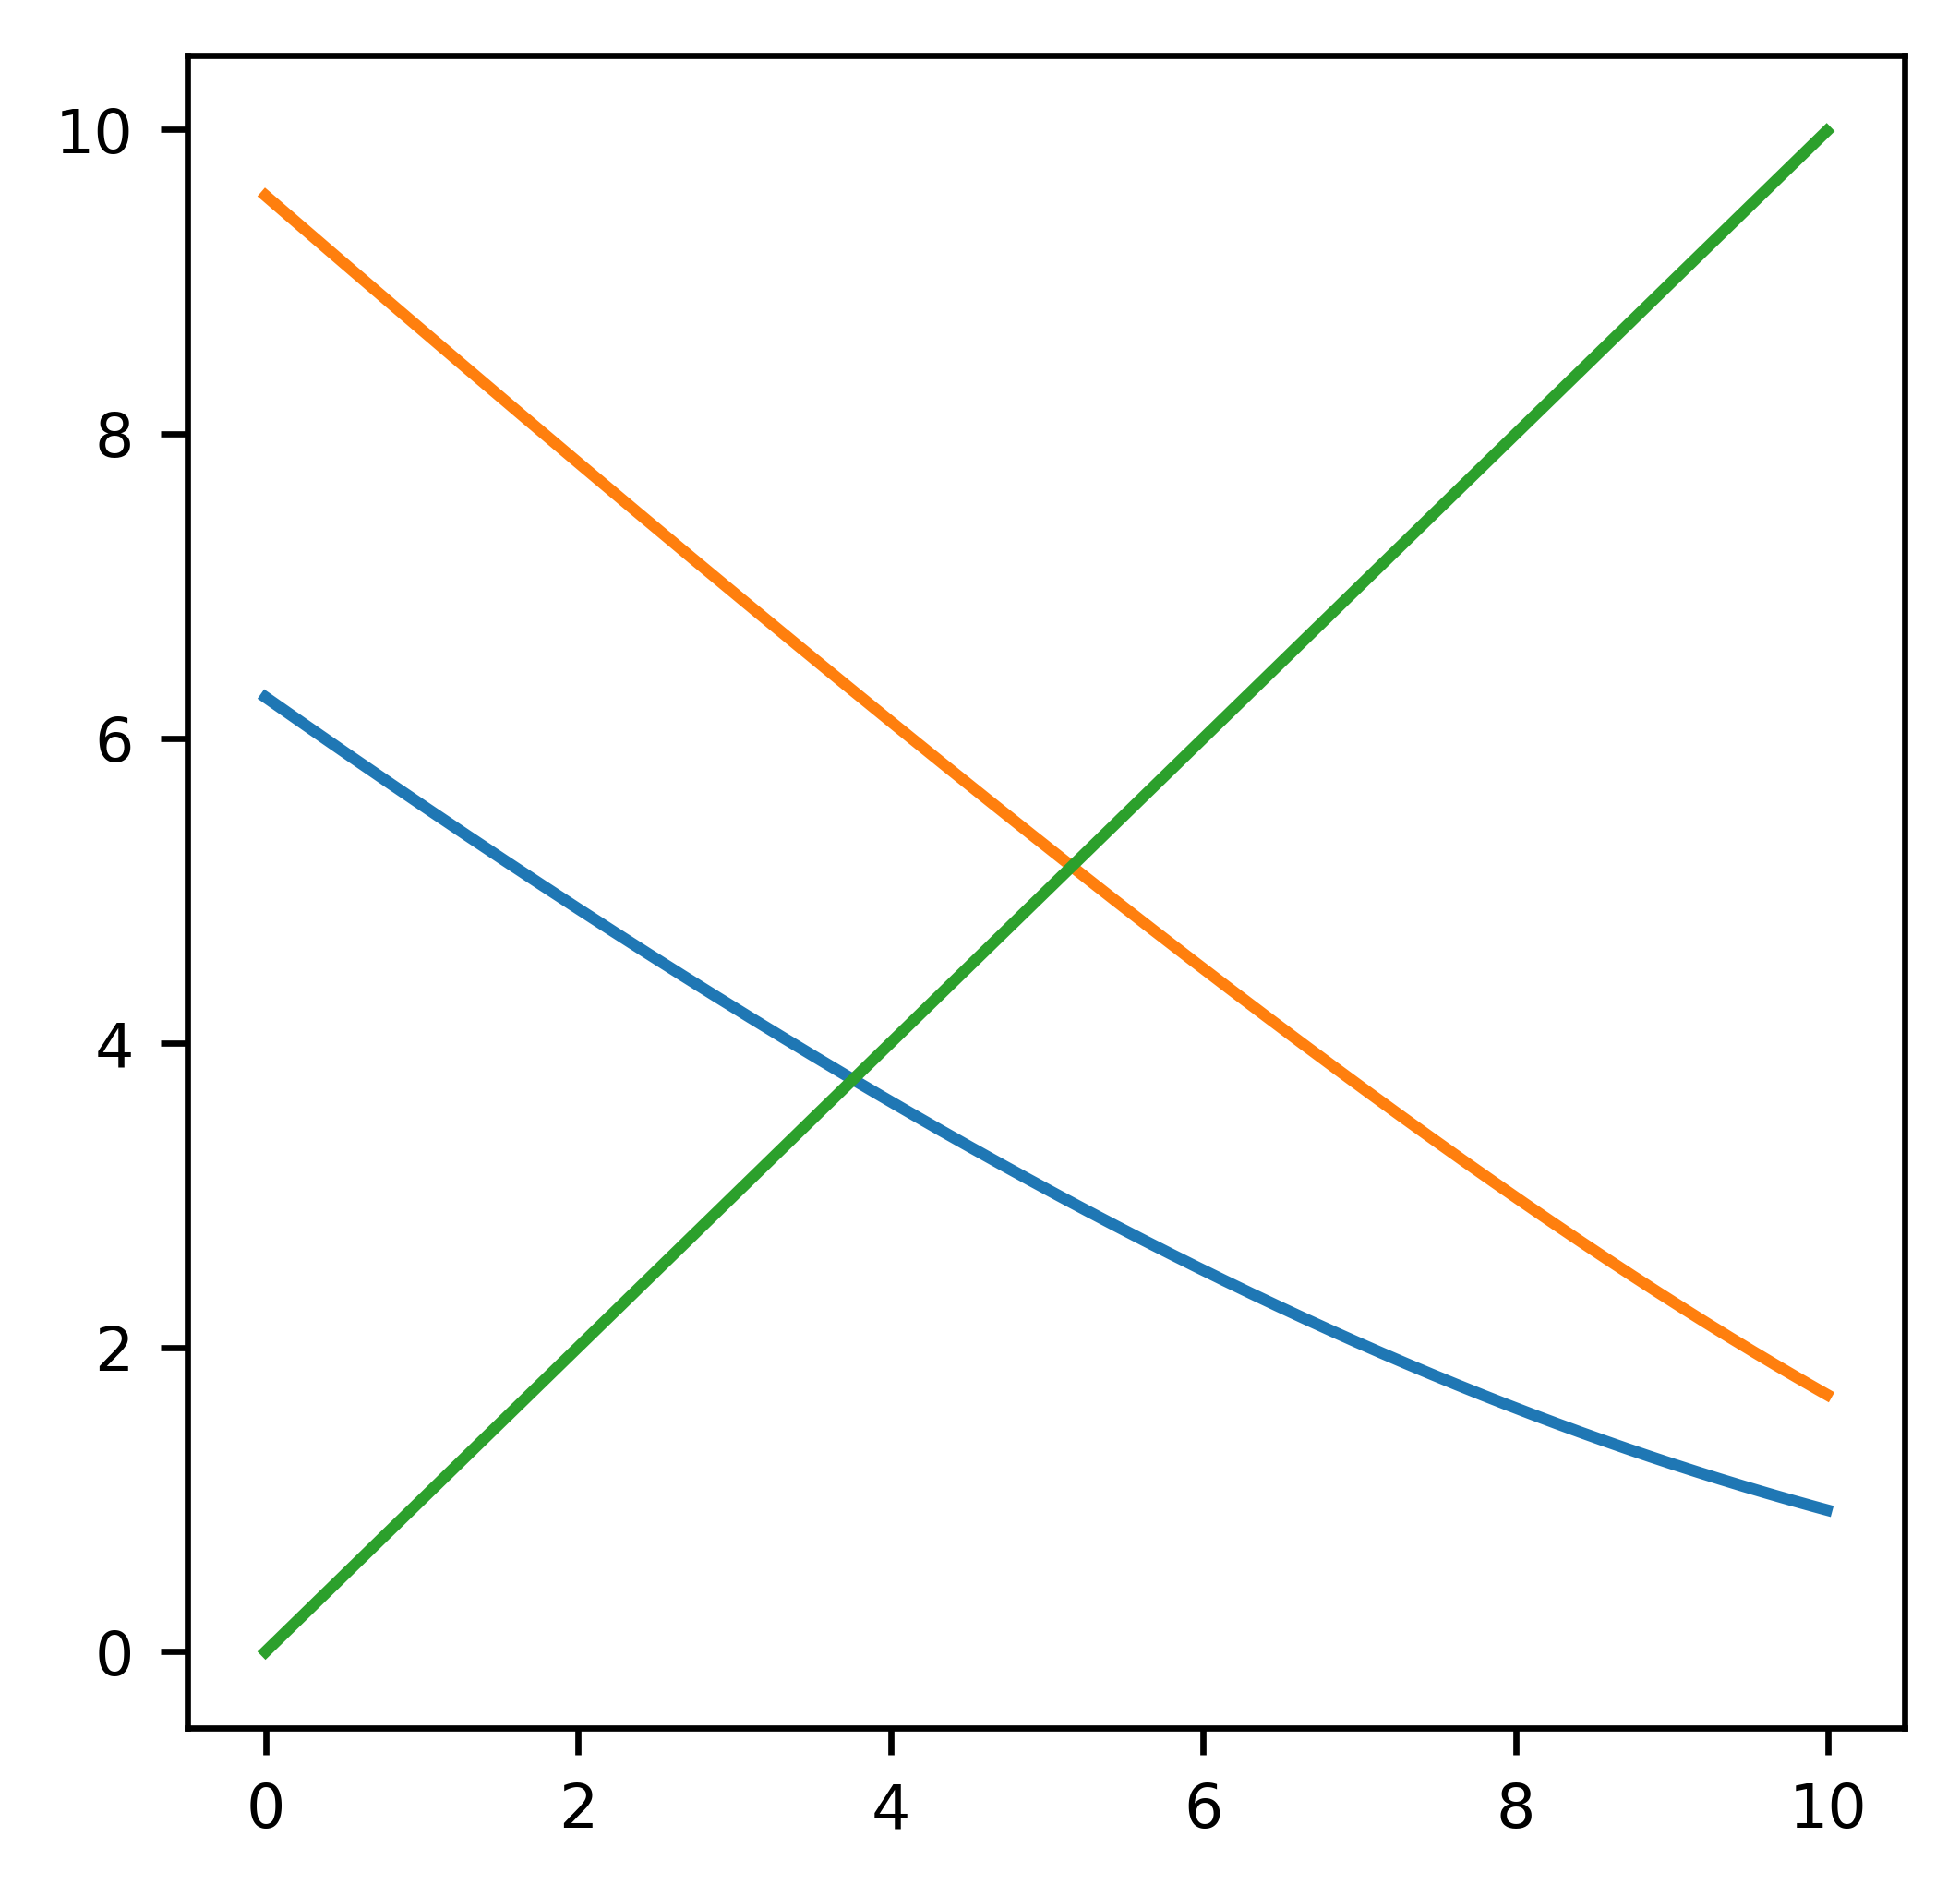

In [115]:
Ui_ = 2*0.41/kli_
Um_ = 1/0.41*(1/klm_)**2
c_ = np.array(x_)
plt.plot(x_, Ui_)
plt.plot(x_, Um_)
plt.plot(x_, c_)


Text(0.9, 0.65, '$\\beta_{us}$')

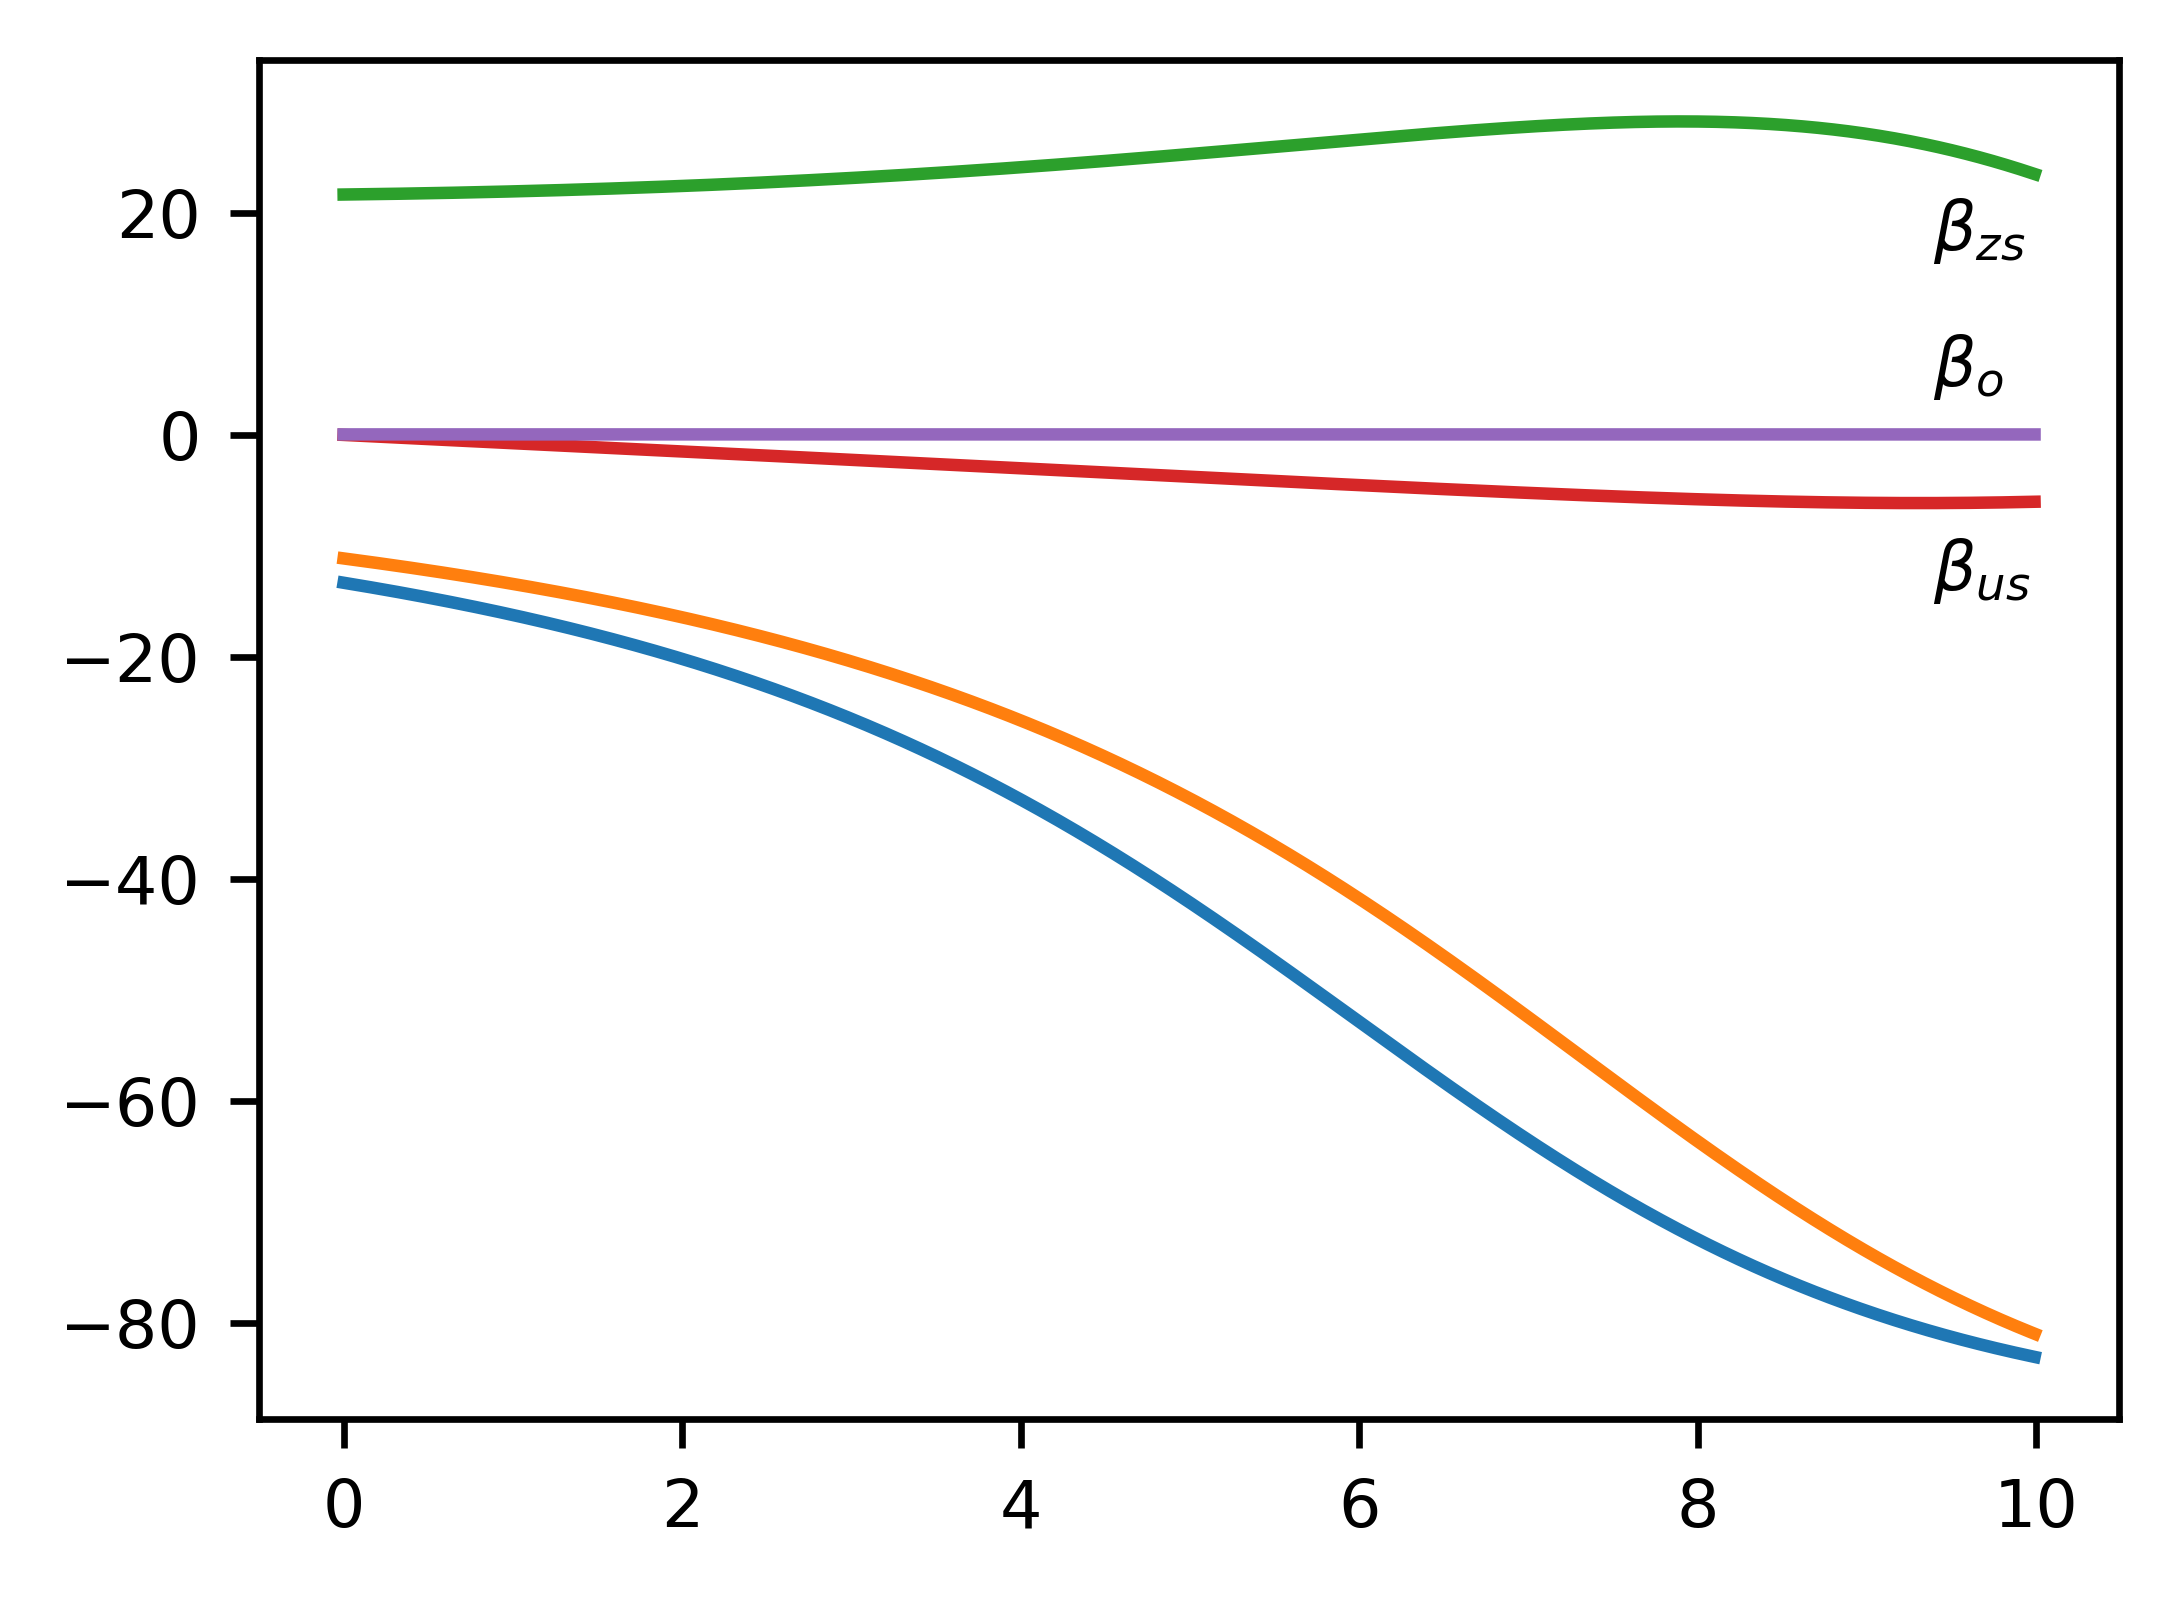

In [125]:
# beta_zs = 2*((Um_-c_)/(Ui_-c_))**4*(2-c_/Ui_)
# beta_us = -2*((Um_-c_)/(Ui_-c_))**2*c_/Ui_
# delta = 1/(-1/0.41/np.log(0.001) - c_)
# beta_0 = 2*0.41*delta_**1.8*(Um_-c_)

beta_zs = 2*(Um_/Ui_)**4*(2-c_/(Ui_+c_))
beta_us = -2*(Um_/Ui_)**2*c_/(Ui_+c_)
delta = 1/(-1/0.41/np.log(kz0) - c_)
beta_0 = 2*0.41*delta_**1.8*Um_

phi_ = np.arctan(-(1/Um_)**2*beta_zs)
phi_prime = np.arctan(-(1/Um_)**2*18)

fig = plt.figure(figsize=[4,3])
plt.plot(x_, np.degrees(phi_))
plt.plot(x_, np.degrees(phi_prime))
plt.plot(x_, beta_zs)
plt.plot(x_, beta_us)
plt.plot(x_, beta_0)
ax=plt.gca()
ax.annotate(r'$\beta_{zs}$', xy=(0.9, 0.9), ha='left', va='top', xycoords='axes fraction')
ax.annotate(r'$\beta_{o}$', xy=(0.9, 0.8), ha='left', va='top', xycoords='axes fraction')
ax.annotate(r'$\beta_{us}$', xy=(0.9, 0.65), ha='left', va='top', xycoords='axes fraction')